In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker as lm

In [2]:
# Set names of matrix files
ww_mat_file = 'matrices/ww_info_matrix.txt'
ss_mat_file = 'matrices/ss_prob_matrix.txt'
crp_mat_file = 'matrices/crp_negenergy_matrix.txt'
ars_mat_file = 'matrices/ars_weight_matrix.txt'
saliency_mat_file = 'matrices/saliency_matrix.txt'
ars_seq_file = 'matrices/ars416.txt'

In [47]:
# Load matrices
ww_df = pd.read_csv(ww_mat_file, delim_whitespace=True, index_col=0)
ss_df = pd.read_csv(ss_mat_file, delim_whitespace=True, index_col=0)
crp_df = pd.read_csv(crp_mat_file, delim_whitespace=True, index_col=0)
ars_df = pd.read_csv(ars_mat_file, delim_whitespace=True, index_col=0)
saliency_df = pd.read_csv(saliency_mat_file, delim_whitespace=True, index_col=0)

# load ars sequence
with open(ars_seq_file,'r') as f:
    ars_seq = f.read()
    
# trim ars data
start=10
stop=100
ars_df = ars_df.iloc[start:stop,:]
ars_df.reset_index(inplace=True, drop=True)
ars_seq = ars_seq[start:stop]

# saliency matrix
data = np.load('data/importance_score.npz')
saliency_df = pd.DataFrame(data=data['arr_0'].T, columns=list('ACGT'))

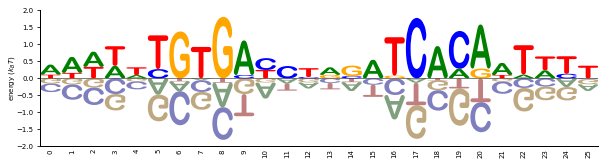

In [10]:
### Style CRP panel
logo = lm.Logo(crp_df, 
               #ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("energy ($k_B T$)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.set_ylim([-2,2])
logo.ax.xaxis.set_tick_params(pad=-1)

Text(0, 0.5, 'probability')

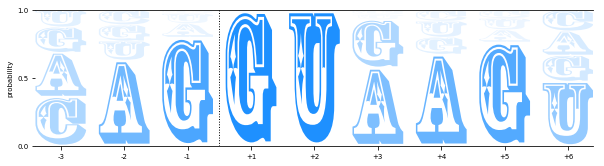

In [11]:
### Style 5'ss panel
logo = lm.Logo(ss_df, 
               #ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

(-1, 30)

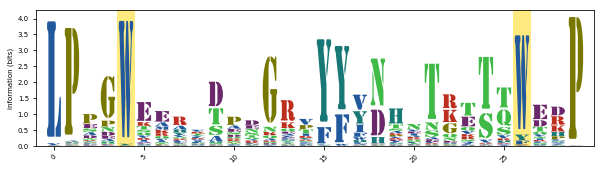

In [12]:
### Style WW panel
logo = lm.Logo(ww_df,
               #ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)
logo.ax.set_xlim([-1,len(ww_df)])


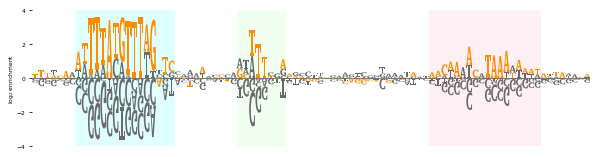

In [56]:
### Style ARS panel
logo = lm.Logo(ars_df, 
               #ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-4,4])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.highlight_position_range(pmin=7, pmax=22, color='lightcyan')
logo.highlight_position_range(pmin=33, pmax=40, color='honeydew')
logo.highlight_position_range(pmin=64, pmax=81, color='lavenderblush')

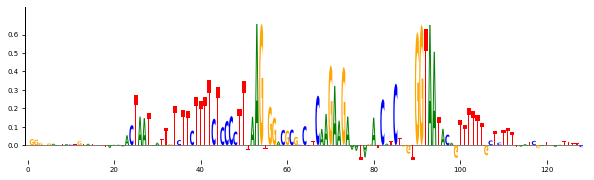

In [19]:
### Style saliency logo
exon_start = 55-.5 
exon_stop = 90+.5 
logo = lm.Logo(saliency_df) #, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_xlim([20,115])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

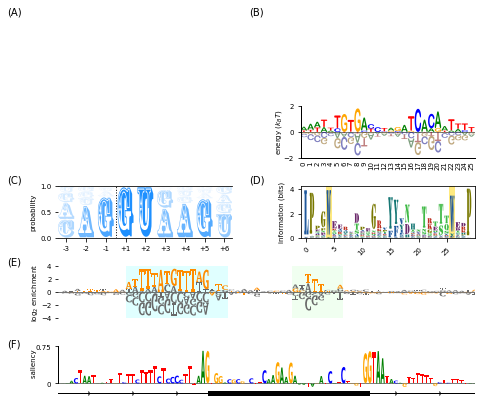

In [20]:
fontsize=7
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

fig = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(nrows=5, ncols=2)

### CRP logo
ax = fig.add_subplot(gs[1, 1])
logo = lm.Logo(crp_df, 
               ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("energy ($k_B T$)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.set_ylim([-2,2])
logo.ax.xaxis.set_tick_params(pad=-1)

### splice site logo
ax = fig.add_subplot(gs[2, 0])
logo = lm.Logo(ss_df, 
               ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

### WW logo
ax = fig.add_subplot(gs[2, 1])
logo = lm.Logo(ww_df,
               ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)
logo.ax.set_xlim([-1,len(ww_df)])

### ARS logo
ax = fig.add_subplot(gs[3, :])
logo = lm.Logo(ars_df, 
               ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-4,4])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.ax.set_xlim([0,65])
logo.highlight_position_range(pmin=11, pmax=26, color='lightcyan')
logo.highlight_position_range(pmin=37, pmax=44, color='honeydew')

### saliency logo
exon_start = 55-.5 
exon_stop = 90+.5 

ax = fig.add_subplot(gs[4, :])
logo = lm.Logo(saliency_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_xlim([20,115])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

# tighten layout
plt.tight_layout(h_pad=1, w_pad=6, pad=4)

# Add panel labels
x1=.01
x2=.49

y1=.98
y2=.79
y3=.59
y4=.40
y5=.21

kwargs = {'fontsize':10, 'horizontalalignment':'left', 'verticalalignment':'top'}

plt.figtext(x1, y1,'(A)', **kwargs)
plt.figtext(x2, y1,'(B)', **kwargs)
plt.figtext(x1, y3,'(C)', **kwargs)
plt.figtext(x2, y3,'(D)', **kwargs)
plt.figtext(x1, y4,'(E)', **kwargs)
plt.figtext(x1, y5,'(F)', **kwargs)

# save a pdf
fig.savefig('figure_logos.pdf', transparent=True)

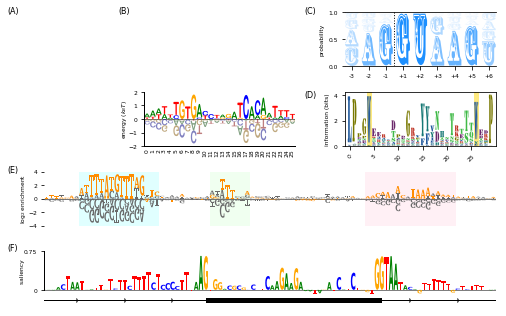

In [59]:
fontsize=6
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

fig = plt.figure(figsize=(7, 4.5))
gs = gridspec.GridSpec(nrows=4, ncols=5)

### CRP logo
ax = fig.add_subplot(gs[1, 1:3])
logo = lm.Logo(crp_df, 
               ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("energy ($k_B T$)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.set_ylim([-2,2])
logo.ax.xaxis.set_tick_params(pad=-1)

### splice site logo
ax = fig.add_subplot(gs[0, 3:5])
logo = lm.Logo(ss_df, 
               ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

### WW logo
ax = fig.add_subplot(gs[1, 3:5])
logo = lm.Logo(ww_df,
               ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)
logo.ax.set_xlim([-1,len(ww_df)])

### ARS logo
ax = fig.add_subplot(gs[2, :])
logo = lm.Logo(ars_df, 
               ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-4,4])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.highlight_position_range(pmin=7, pmax=22, color='lightcyan')
logo.highlight_position_range(pmin=33, pmax=40, color='honeydew')
logo.highlight_position_range(pmin=64, pmax=81, color='lavenderblush')

### saliency logo
exon_start = 55-.5 
exon_stop = 90+.5 

ax = fig.add_subplot(gs[3, :])
logo = lm.Logo(saliency_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_xlim([20,115])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

# tighten layout
plt.tight_layout(h_pad=1, w_pad=4, pad=2)

# Add panel labels
x1=.00
x2=.22
x3=.59

y1=.97
y2=.71
y3=.48
y4=.24

kwargs = {'fontsize':8, 'horizontalalignment':'left', 'verticalalignment':'top'}

plt.figtext(x1, y1,'(A)', **kwargs)
plt.figtext(x2, y1,'(B)', **kwargs)
plt.figtext(x3, y1,'(C)', **kwargs)
plt.figtext(x3, y2,'(D)', **kwargs)
plt.figtext(x1, y3,'(E)', **kwargs)
plt.figtext(x1, y4,'(F)', **kwargs)

# save a pdf
fig.savefig('figure_logos_v2.pdf', transparent=True)